## Modelo dinámico para la propagación del virus COVID-19 en Colombia

A continuación se presenta el desarrollo de un modelo dinámico basado en el modelo epidemiológico SEIRV [en Wuhan, China](http://www.aimspress.com/article/10.3934/mbe.2020148) y, adaptado a la población colombiana (50 millones de habitantes aproxiadamente). 

El sistema sigue las siguientes ecuaciones diferenciales:

$$ \frac{dS}{dt} = \Lambda - \beta_1(E) E S - \beta_2(I) S I - \beta_3(V) S V - \mu S $$

$$ \frac{dE}{dt} =  \beta_1(E) E S + \beta_2(I) S I + \beta_3(V) S V - (\alpha + \mu) E $$

$$ \frac{dI}{dt} = \alpha E - (\omega + \gamma + \mu) I $$

$$ \frac{dR}{dt} = \gamma I - \mu R $$

$$ \frac{dV}{dt} = \xi_1 E + \xi_2 I - \sigma V $$

donde S es el número de personas sanas no infectadas, E el número de personas expuestas (portadores asintomaticos o sanos que propagan el virus), I las peronas enfermas, R las personas sanas que se recuperaron del virus y V es la concentración de virus en el ambiente

Las __Funciones de Contacto Directo__ (tasas $\beta$) toman la forma $$ \beta_i(x) = \frac{\beta_0(i)}{1 + c(i)x}  $$ siendo $\beta_1$ para el contacto E-S (transmisión directa expuestos-sanos), $\beta_2$ para el contacto (transmisión directa infectados-sanos) I-S y  $\beta_3$ para el contacto S-V (transmisión indirecta sanos-ambiente). Ademas, se tienen los siguientes valores para la constante de transmisión $\beta_0$ ($\frac{1}{persona \ dia}$) y  el coeficiente de ajuste para la transmisión $c$ ($\frac{1}{persona}$).

$$ \beta_0 = [1.5 \times 3.11 \times 10^{-9}, \ 1.5 \times 0.62 \times 10^{-9}, \ 1.5 \times 1.03 \times 10^{-9} ] $$

$$ c = [1.01 \times 10^{-4}, \ 1.01 \times 10^{-4}, \ 1.01 \times 10^{-4}  ] $$

cabe notar que los anteriores valores han sido adaptados a partir de los datos disponibles para Colombia. 

Por último, todos los __parámetros del modelo__ se describen a continuación:

$\Lambda \ (\frac{personas}{dia}) = 15.098 \times 5 \times 10^4 \times \frac{1}{365} $: Tasa de natalidad. se usa dato reportado por el banco mundial en el 2017. 

$\mu \ (\frac{persona}{dia}) = \frac{5.503 \times 5 \times 10^4}{5 \times 10^6 \times 365} $: Tasa de muertes naturales. Se usa dato reportado por el BM de 5.503 por mil habitantes.

$\alpha \ (\frac{1}{dia})=\frac{1}{7}$: Frecuencia de incubación.

$\omega \ (\frac{1}{dia})= 10^{-2} $: Tasa de muerte inducida por el virus.

$\gamma \ (\frac{1}{dia})= \frac{1}{15} $: Tasa de recuperación. 

$\xi_1 \ (\frac{1}{dia}) = 2.30$: Tasa de dispersión del virus al ambiente por los individuos sanos portadores.

$\xi_2 \ (\frac{1}{dia}) = 0$: Tasa de dispersión del virus al ambiente por los individuos enfermos.

$\sigma \ (\frac{1}{dia}) = 1$: Tasa de remoción del virus en el ambiente.

In [1]:
##=== Importando librerías ===##
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
##=== Definiendo valores de parametros==##

lbd = (15.098*5* 10**4) / 365 
mu = (5.503*5* 10**4) / (5* pow(10, 6) *365) 
alpha = 1/7
omega = pow(10,-2)
gamma = 1/15
xi_1 = 2.30
xi_2 = 0
sigma = 1

def betaf(i, x):
    b0 = [1.5*3.11*pow(10, -9), 1.5*0.62*pow(10, -9), 1.5*1.03*pow(10, -9)]
    c = [1.01*pow(10, -4), 1.01*pow(10, -4), 1.01*pow(10, -4)]
    
    b = b0[i-1] / (1 + c[i-1]*x)
    
    return b

##=== Definiendo sistema de ecuaciones ===##

def syst(y, t, beta, xi_2):
    S, E, I, R, V = y
    
    dS = lbd - beta(1, E)*E*S - beta(2, I)*S*I - beta(3,V)*S*V - mu*S
    dE = beta(1,E)*E*S + beta(2,I)*S*I + beta(3,V)*S*V - (alpha + mu)*E
    dI = alpha*E - (omega + gamma + mu)*I
    dR = gamma*I - mu*R 
    dV = xi_1*E + xi_2*I - sigma*V
    
    return [dS, dE, dI, dR, dV]

para las __condiciones iniciales__ en la integración se tienen dos posibilidades, las dadas en el artículo para la epidemia de Wuhan después de la cuarentena ($sys0_w$) o, las condiciones iniciales para el inicio de la epidemia en una población de tamaño n ($sys0_n$)

$$ sys0_w = [8998505, 1000, 475, 10, 10000] $$
$$ sys0_n = [n, 0, 0, 0, 100] $$

In [28]:
##=== Definiendo condiciones iniciales ===##
sys0_w = [8998505, 1000, 475, 10, 10000]

def sys0_n(n): return [n, 0, 0, 0, 100]

##=== Definiendo tiempo de integración ===##
t = np.arange(0, 300)

In [29]:
##=== Integrando sistema de ecuaciones para colombia ===###
Col_sol = integrate.odeint(syst, sys0_n(5*10**7), t, args=(betaf, xi_2) )

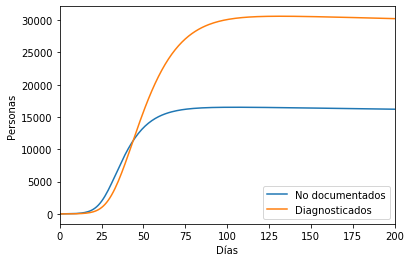

In [33]:
##=== Graficando primeros resultados ===###
plt.plot(t, Col_sol[:, 1], label="No documentados")
plt.plot(t, Col_sol[:, 2], label="Diagnosticados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 200)
plt.legend()
plt.show()

Tomamos el número de casos reportados para __Colombia__ en los primeros 10 días después del primer paciente positivo para COVID-19 en el territorio y lo ajustamos a nuestro modelo

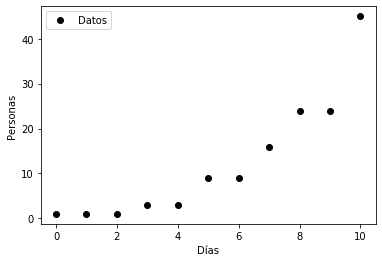

In [40]:
##=== Datos para Colombia ===##
Col10 = [1, 1, 1, 3, 3, 9, 9, 16, 24, 24, 45]

plt.plot(t[0:11], Col10, 'ko', label="Datos")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.legend()
plt.show()

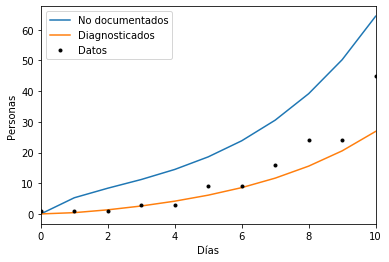

In [39]:
##=== Graficando primeros resultados y datos reportados ===###
plt.plot(t[0:11], Col_sol[0:11, 1], label="No documentados")
plt.plot(t[0:11], Col_sol[0:11, 2], label="Diagnosticados")
plt.plot(t[0:11], Col10, 'k.', label="Datos")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 10)
plt.legend()
plt.show()

A partir del modelo mostrado, se propone visualizar __como sería la propagación si no hay intervención__ al modificar las tasas de contacto $\beta_i$

In [48]:
##=== Definiendo función de contacto directo modificada ===##
def betaf_mod(i, xc, x):
    b0 = [1.5*3.11*pow(10, -9), 1.5*0.62*pow(10, -9), 1.5*1.03*pow(10, -9)]
    c = [0, 0, 0] 
    #c = [1.01*pow(10, -4), 1.01*pow(10, -4), 1.01*pow(10, -4)]
    
    if x<xc:
        b = b0[i-1]
    else: 
        b = b0[i-1]*(1+c[i-1]*xc) / (1+c[i-1]*x)
    
    return b

def beta_mod(i, x): # forma reducida para c=[0,0,0]
    b0 = [1.5*3.11*pow(10, -9), 1.5*0.62*pow(10, -9), 1.5*1.03*pow(10, -9)]
    b = b0[i-1]
    return b

In [49]:
##=== solucionando ecuaciones para tasas modificadas ===##
Col_sol_mod = integrate.odeint(syst, sys0_n(5*10**7), t, args=(beta_mod, xi_2) )

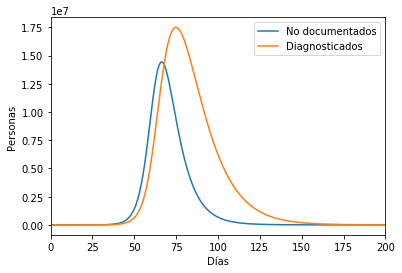

In [50]:
##=== Graficando nuevos resultados ===###
plt.plot(t, Col_sol_mod[:, 1], label="No documentados")
plt.plot(t, Col_sol_mod[:, 2], label="Diagnosticados")
plt.xlabel("Días")
plt.ylabel("Personas")
plt.xlim(0, 200)
plt.legend()
plt.show()